In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data= pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")
data.head()

# TO AVOID UNICODE ERROR, WE ARE USING "unicode_escape"

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.shape

(11251, 15)

# data cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# delete blank columns

In [6]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


# checking null values

In [9]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# deleting null values

In [10]:
data.shape

(11251, 13)

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(11239, 13)

In [14]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# changing data types

In [15]:
data['Amount']=data['Amount'].astype("int")

In [17]:
data['Amount'].dtypes

dtype('int32')

# statistics

In [18]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [26]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# exploratory data analysis

In [27]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# gender

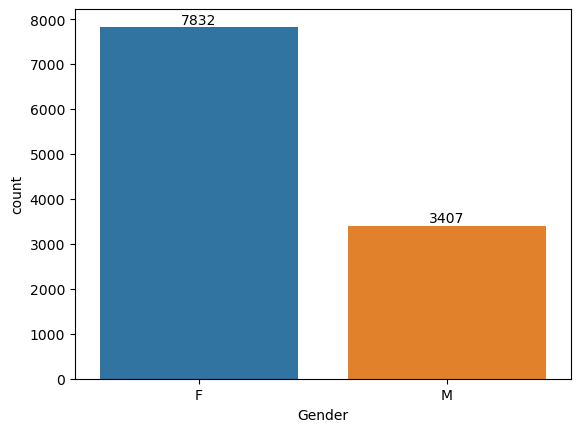

In [30]:
ax = sns.countplot(x='Gender',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount",ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

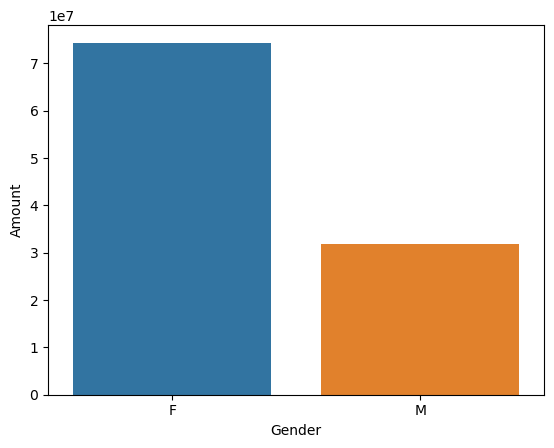

In [35]:
sales_gen= data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount",ascending = False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

from the above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# age

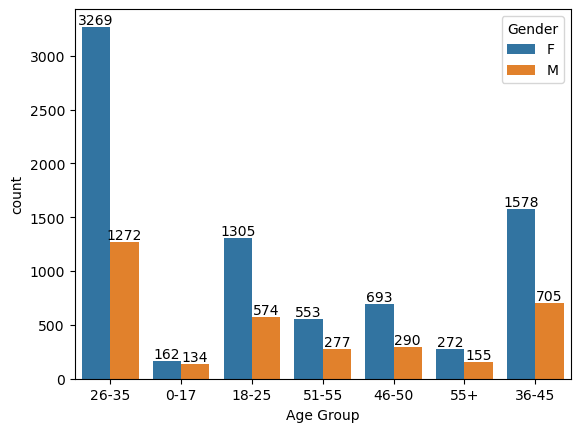

In [39]:
ax = sns.countplot(data= data,x='Age Group', hue= 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
sales_age=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

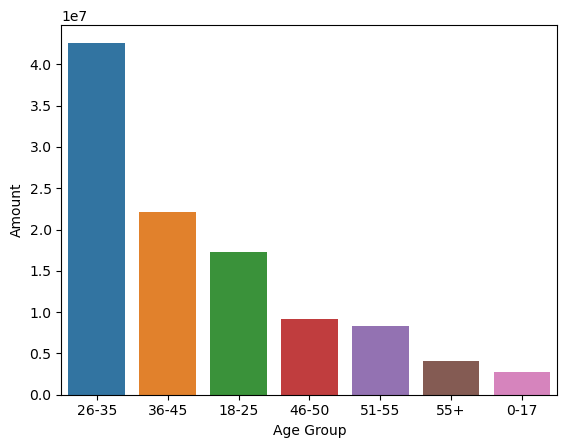

In [46]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)

from the above graphs we can see that most of the buyers are of age group between 26 and 35.

# state

In [48]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [51]:
sales_state= data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='Orders', ylabel='State'>

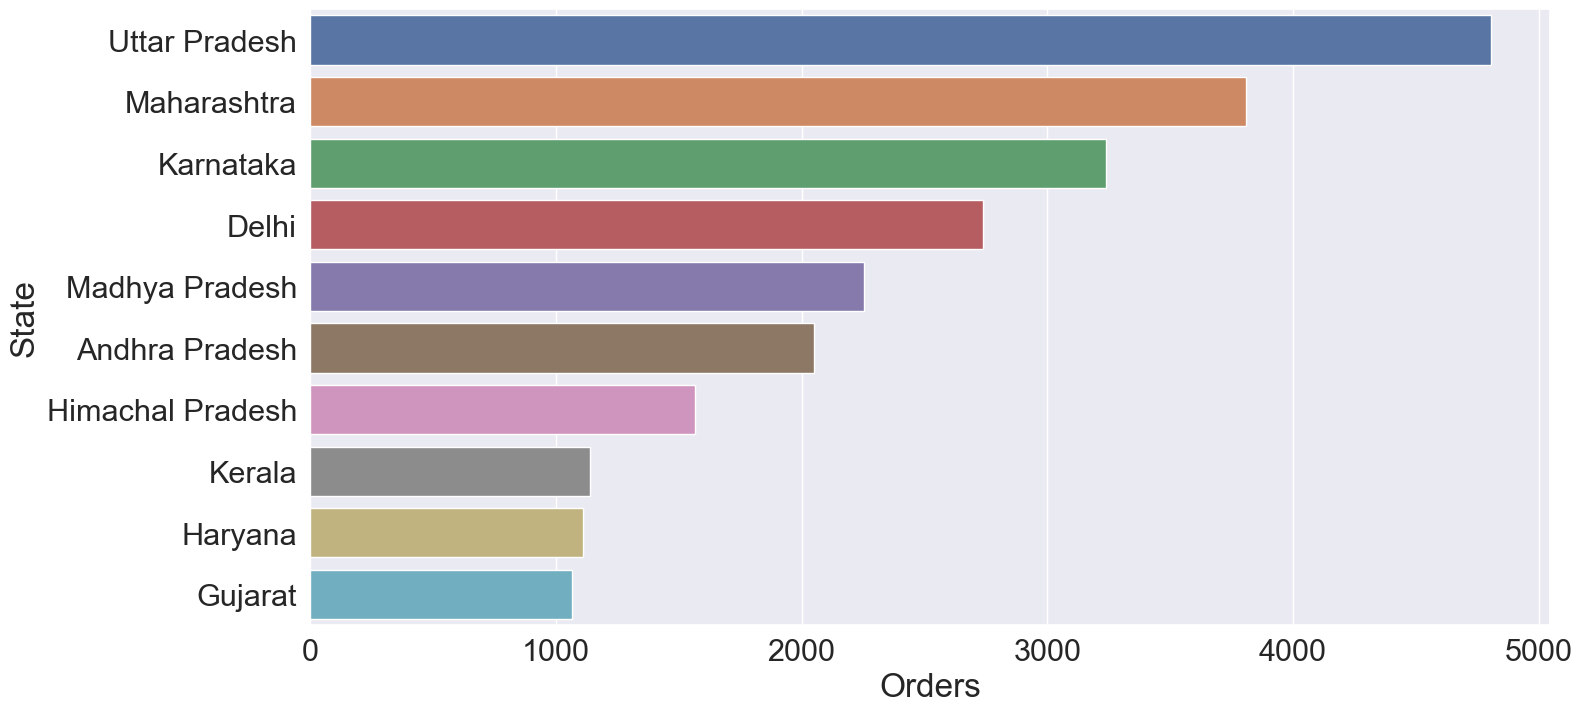

In [64]:
#TOTAL NUMBER OF ORDERS FROM TOP 10 STATES
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=2)
sns.barplot(data=sales_state,y='State',x="Orders")

In [57]:
#TOTAL  AMOUNT FROM TOP 10 STATES
sales_state_amt= data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state_amt

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='Amount', ylabel='State'>

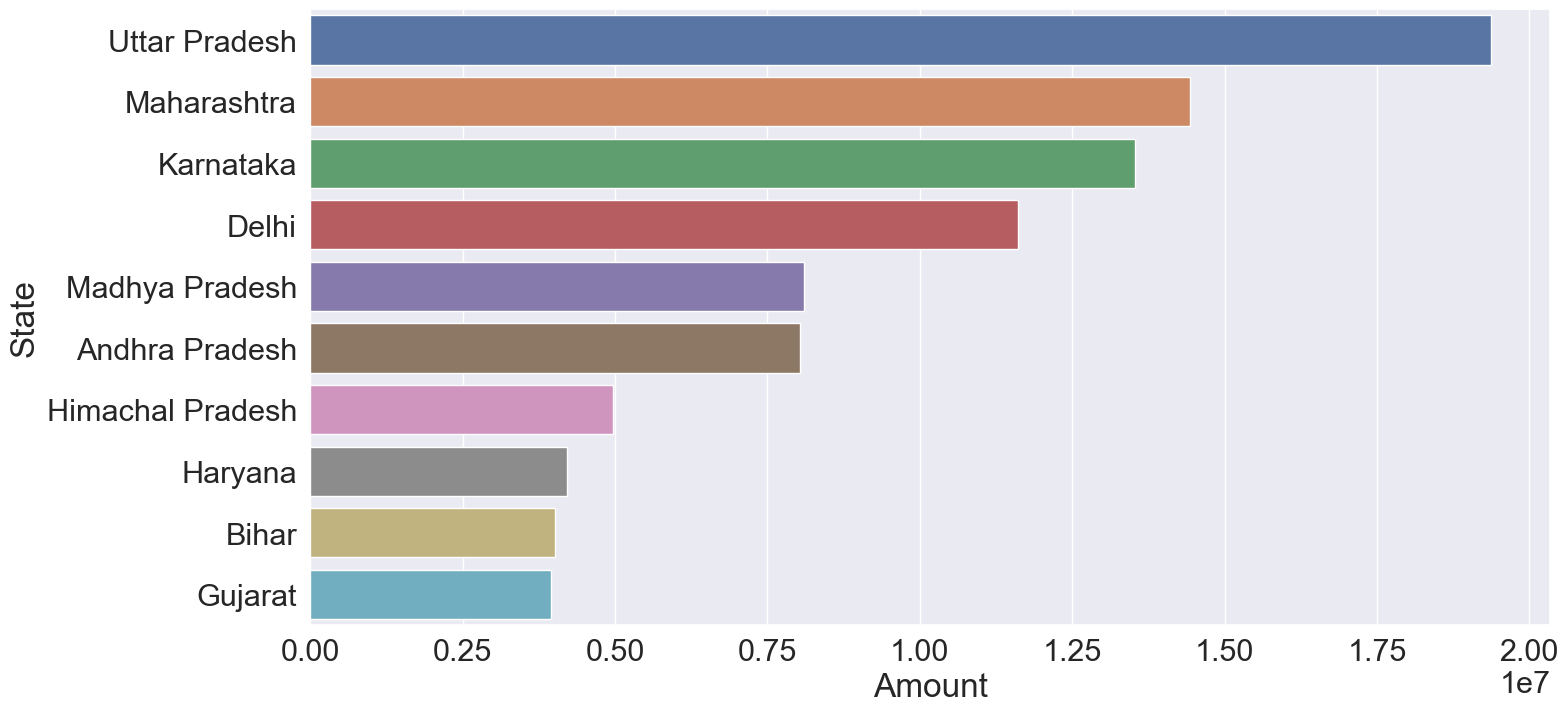

In [62]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=2)
sns.barplot(data=sales_state_amt,y='State',x="Amount")

from the above graphs we can see that most of the orders and sales or amount are form UP, Maharashtra and Karnataka.

# marital status

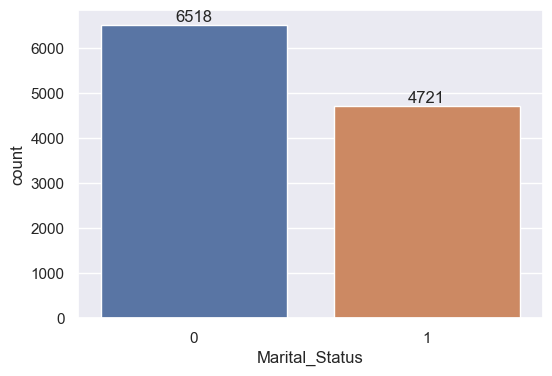

In [78]:
ax=sns.countplot(data=data,x="Marital_Status")
sns.set(rc={'figure.figsize':(8,6)})
for bars in ax.containers:
    ax.bar_label(bars)

In [81]:
sales_mar=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_mar

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


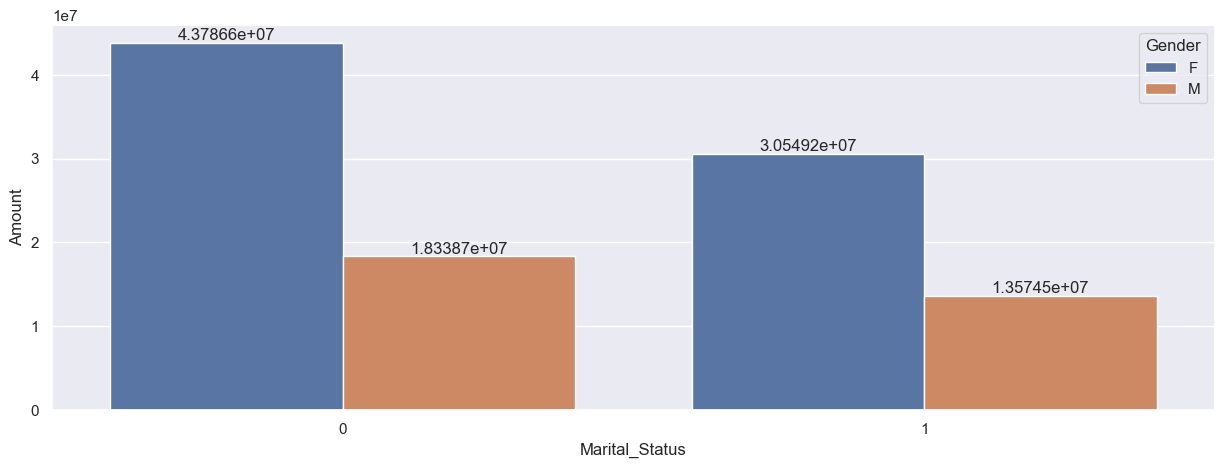

In [84]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=sales_mar,x="Marital_Status",y="Amount",hue='Gender')
for i in ax.containers:
    ax.bar_label(i)

from the above graphs we can see that most of the buyers are married (womens) and they have high purchasing power.

# occupation

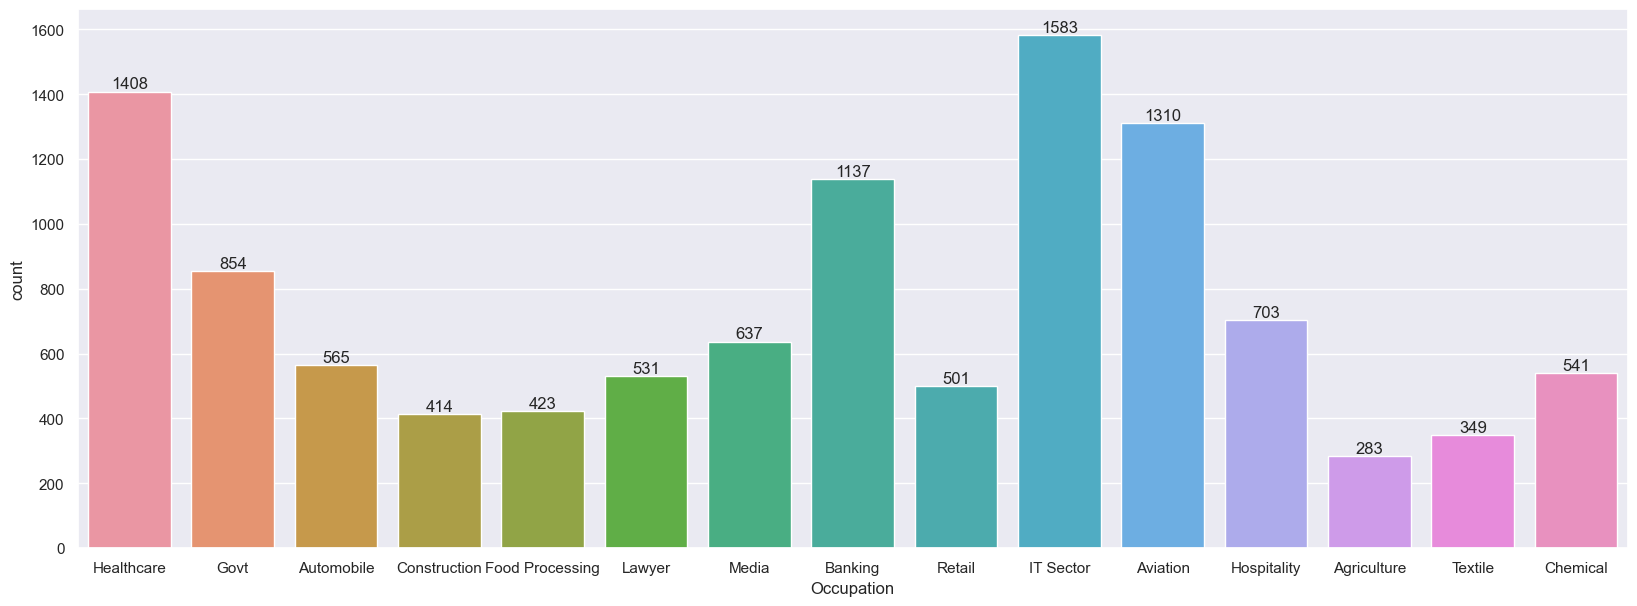

In [89]:
ax=sns.countplot(data=data,x="Occupation")
sns.set(rc={'figure.figsize':(25,7)})
for i in ax.containers:
    ax.bar_label(i)

In [92]:
sales_occ=data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)
sales_occ

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

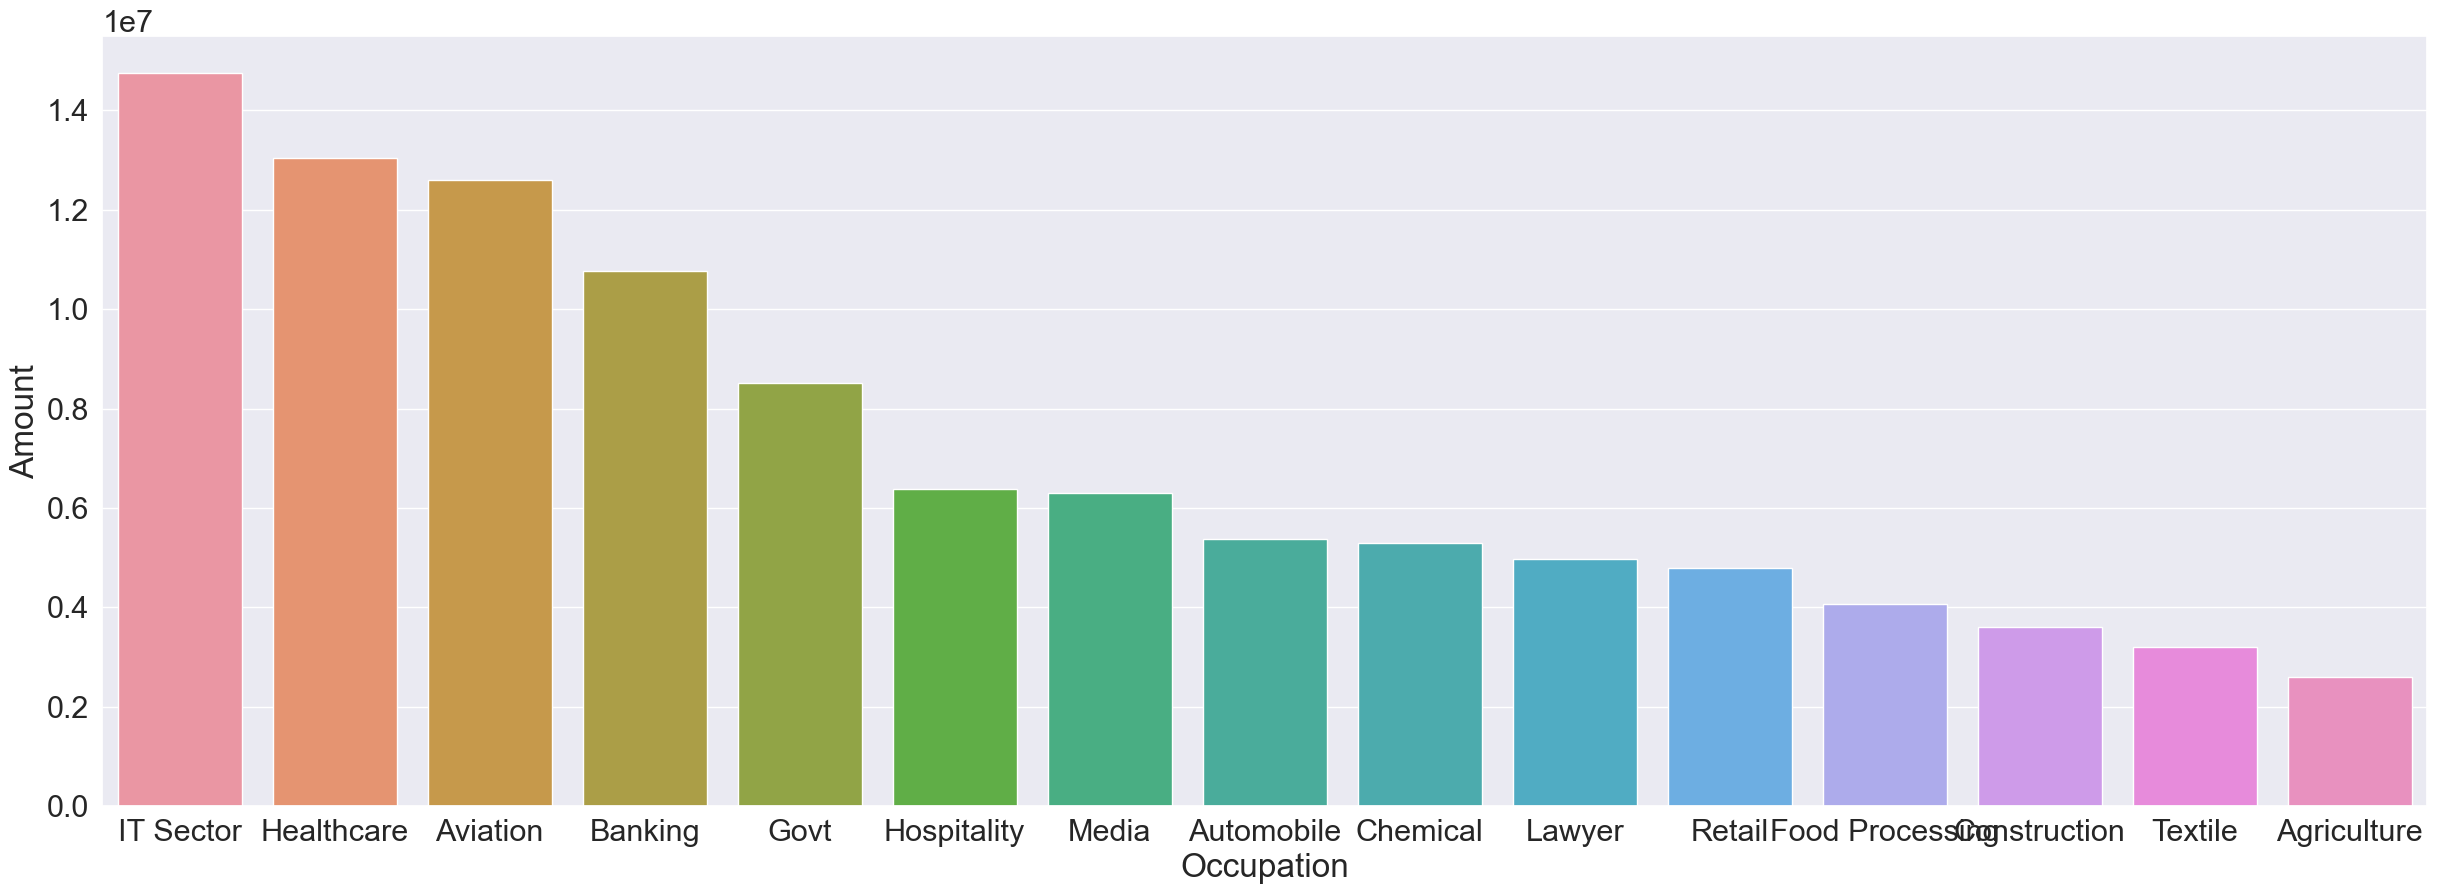

In [96]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)
sns.barplot(data=sales_occ,x='Occupation',y='Amount')

from the above graphs we can see that most of the buyers working at IT,  Healthcare,  Aviation.

In [98]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# product category

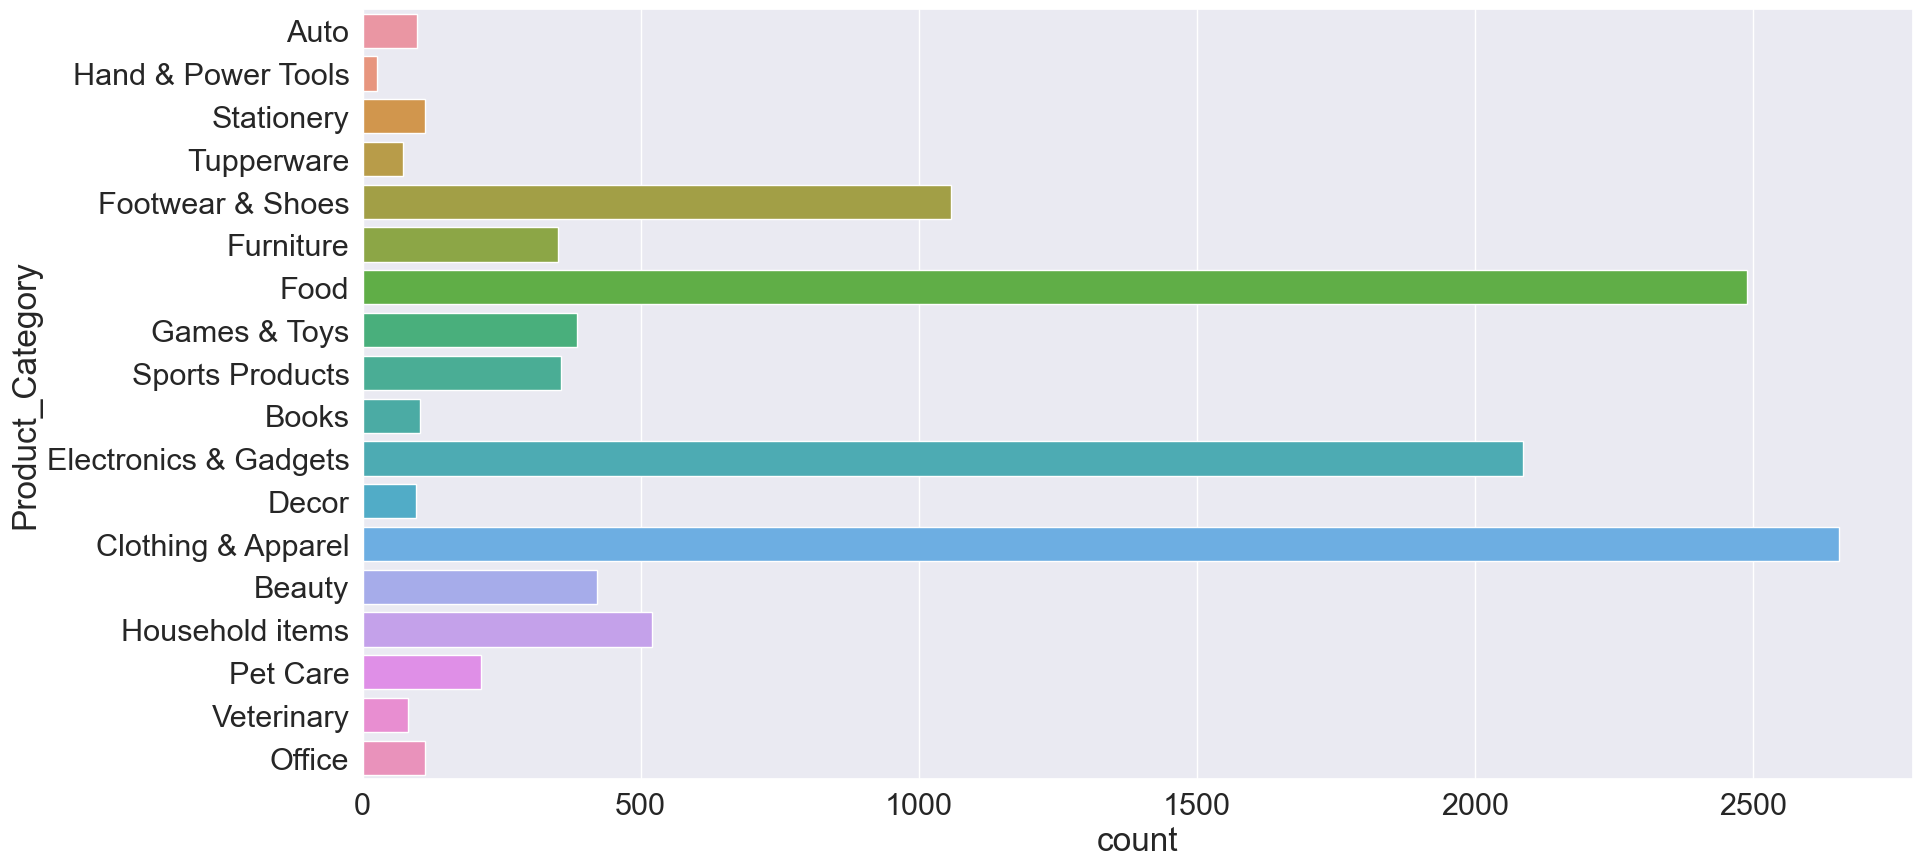

In [140]:
sns.countplot(data=data, y="Product_Category")
sns.set(rc={"figure.figsize":(20,5)})
sns.set(font_scale=2)

In [160]:
sales_pro=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head()
sales_pro

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


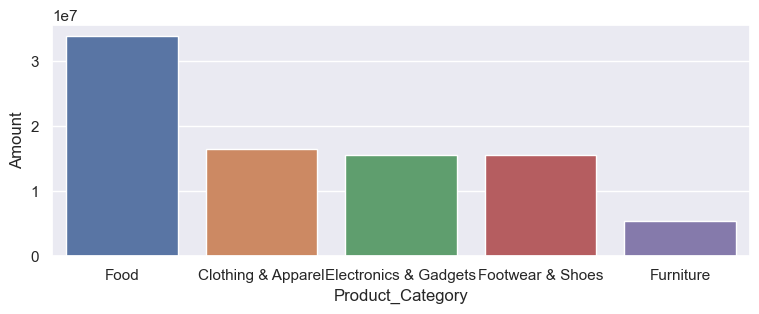

In [167]:
sns.barplot(data=sales_pro,x="Product_Category",y='Amount')
sns.set(rc={'figure.figsize':(9,5)})
sns.set(font_scale=1)

from the above graphs we can see that most of the sold products are from food , clothing and  electronics.

# conclusion:

Married women age group 26-35 years from UP, Maharastra and Karnataka working in IT , Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category. 